# User analytics 

In [1]:
from __future__ import print_function
import sys
import numpy as np
sys.path.append('../')

In [2]:
import whatstk.parser as wp
import whatstk.vis as wv

/Users/lucasrodes/whatstk/.whatstk/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
#chat = wp.WhatsAppChat("../chats/samplechat.txt")
chat = wp.WhatsAppChat("../chats/dash/samplechat_2.txt", date_format='dmy')

### Checking

In [9]:
parsed_chat_old == chat.parsed_chat

True

In [7]:
[o == n for o,n in zip(parsed_chat_old, chat.parsed_chat)]

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True]

In [4]:
parsed_chat_old = chat.parsed_chat

## Number of internventions
Let us have a look at which users tend to have more interventions.

In [7]:
# Dataframe containing the cummulative number of user interventions per day (only days of chat activity are considered)
interventions_day = wp.user_interventions(chat, 'days', length=True)
interventions_day_cum = np.cumsum(interventions_day)

/Users/lucasrodes/whatstk/.whatstk/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


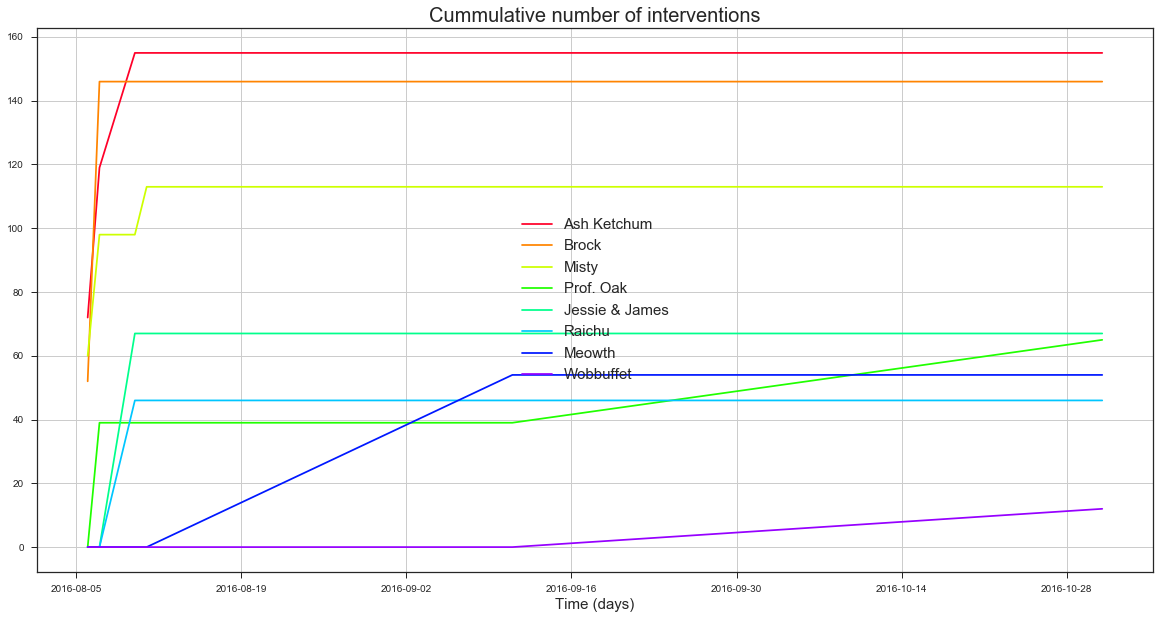

In [8]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
wv.temporal_data(interventions_day_cum, "Cummulative number of interventions")

Now let us take a look at the distribution of the length of the interventions of each user. This can give us some insights about which users tend to send out longer (shorter) messages.

In [9]:
hist = wp.histogram_intervention_length(chat)

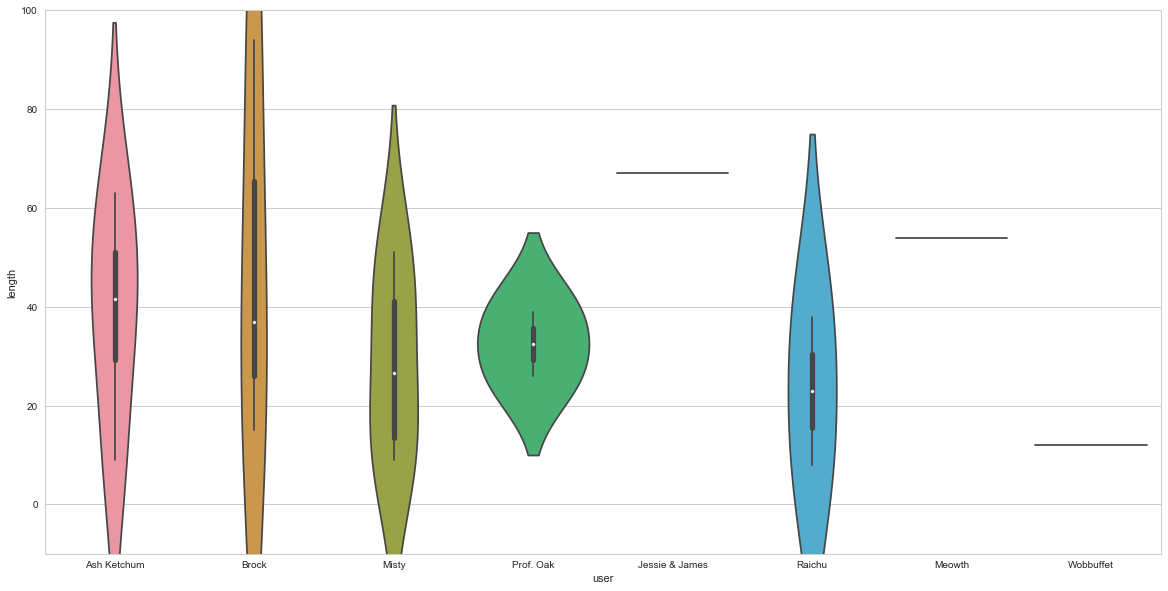

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.violinplot(x="user", y="length", data=hist)
plt.ylim(-10, 100)
plt.show()